In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

plt.style.use(['fivethirtyeight'])

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
df = pd.read_csv('/home/piai/test/1. Big_Data_분석기초/체질검사.csv')

In [3]:
df

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


- BMI 칼럼 생성

In [4]:
df['BMI'] = (df['WEIGHT']*0.45) / (df['HEIGHT']*2.54/100)**2

In [5]:
df.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,25.736762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,9.482758
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,17.874982
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,22.853241
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,24.895566
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,27.118085
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,164.306562


In [6]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


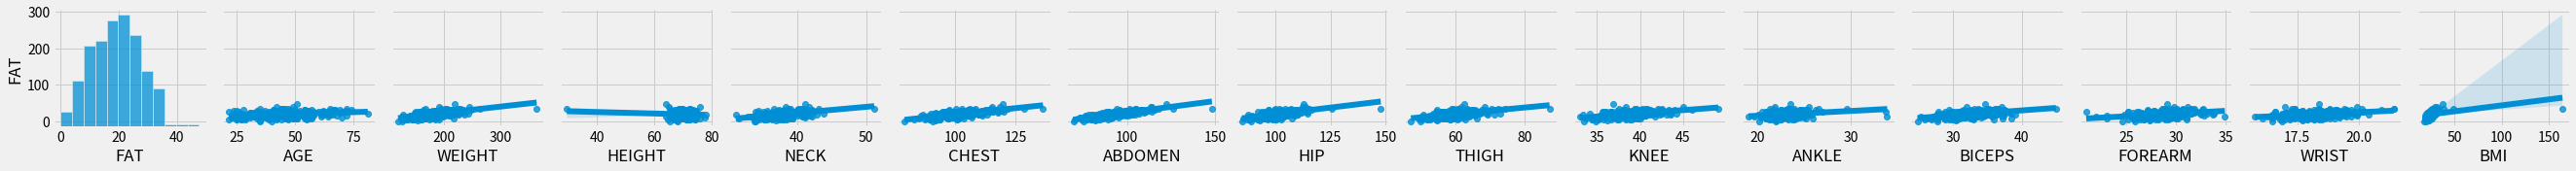

In [7]:
sns.pairplot(df, y_vars='FAT', x_vars = list(df.columns), kind='reg')

- 목표변수와 설명변수 간 선형관계가 확인 되지만 각 칼럼별로 이상치가 존재하는 것 같아 boxplot을 그려 제거여부를 판단하고자 함

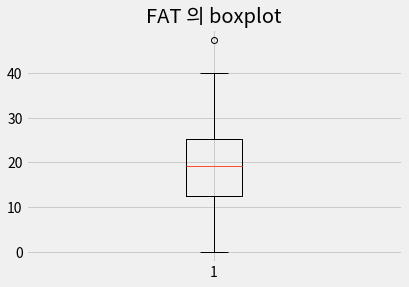

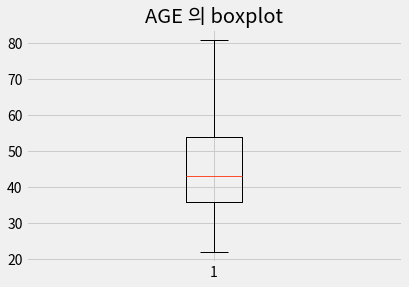

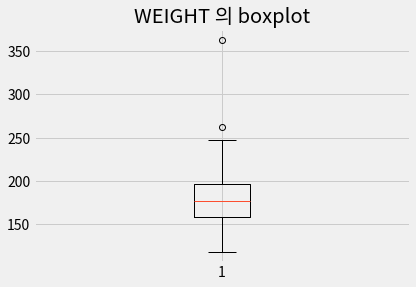

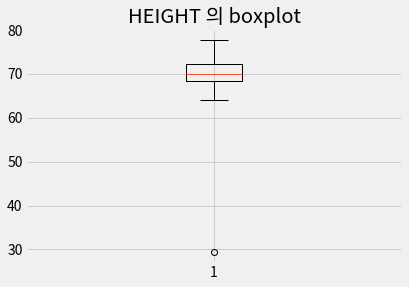

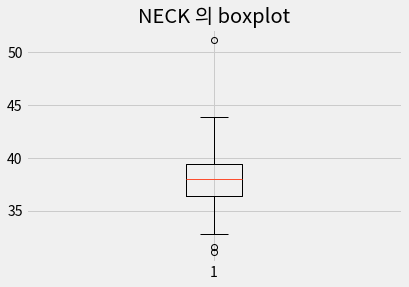

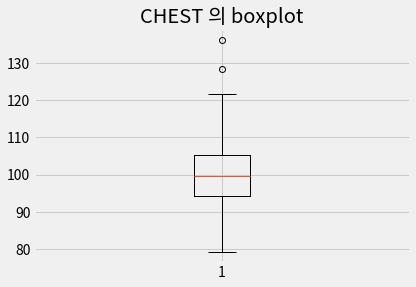

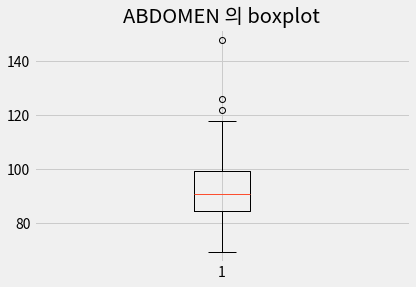

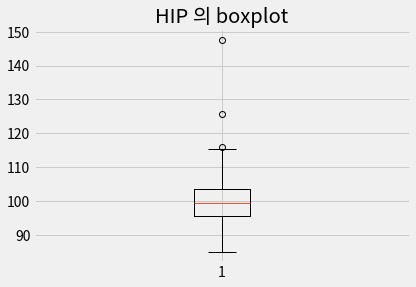

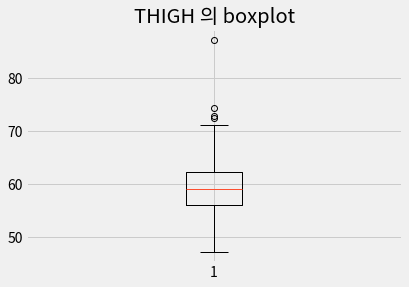

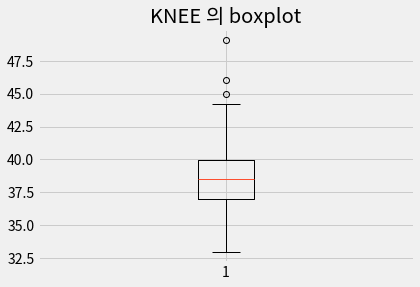

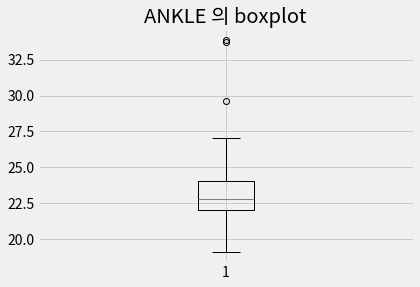

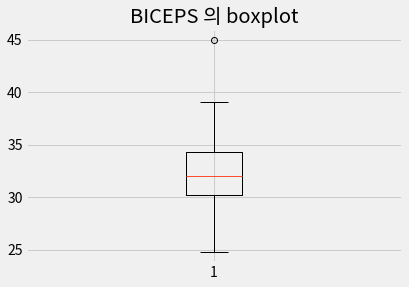

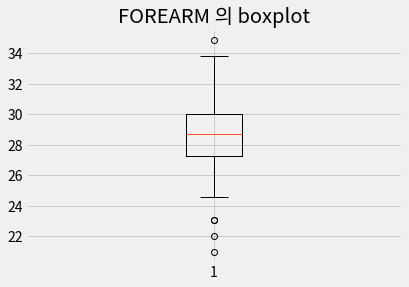

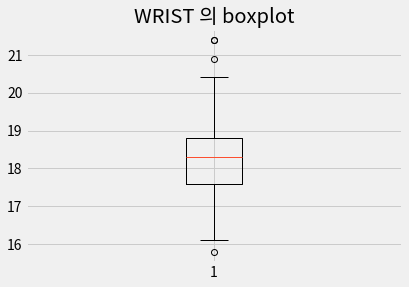

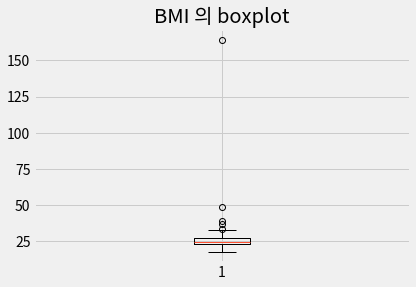

In [8]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.title('{} 의 boxplot'.format(i))
    plt.show()

In [9]:
print('WEIGHT의 이상치 index : ' , df[df['WEIGHT'] == df.WEIGHT.max()].index[0])
print('HEIGHT의 이상치 index : ', df[df['HEIGHT'] == df.HEIGHT.min()].index[0])
print('NECK의 이상치 index : ', df[df['NECK'] == df.NECK.max()].index[0])
print('CHEST의 이상치 index : ', df[df['CHEST'] == df.CHEST.max()].index[0])
print('ABDOMEN의 이상치 index : ', df[df['ABDOMEN'] == df.ABDOMEN.max()].index[0])
print('HIP의 이상치 index : ', df[df['HIP'] == df.HIP.max()].index[0])
print('THIGH의 이상치 index : ', df[df['THIGH'] == df.THIGH.max()].index[0])
print('KNEE의 이상치 index : ', df[df['KNEE'] == df.KNEE.max()].index[0])
print('ANKLE의 이상치 index : ', df[df['ANKLE'] == df.ANKLE.max()].index[0])
print('BICEPS의 이상치 index : ', df[df['BICEPS'] == df.BICEPS.max()].index[0])
print('BMI의 이상치 index : ', df[df['BMI'] == df.BMI.max()].index[0])

WEIGHT의 이상치 index :  0
HEIGHT의 이상치 index :  78
NECK의 이상치 index :  0
CHEST의 이상치 index :  0
ABDOMEN의 이상치 index :  0
HIP의 이상치 index :  0
THIGH의 이상치 index :  0
KNEE의 이상치 index :  0
ANKLE의 이상치 index :  93
BICEPS의 이상치 index :  0
BMI의 이상치 index :  78


- 이상치가 조금 있지만 HEIGHT와 WEIGHT의 경우 너무 극단적인 이상치가 존재한다. 0번째, 78번째 인덱스에 존재하는 사람이 각 칼럼의 이상치의 대부분을 만들어 내고 있다.

- IQR을 사용하여 각 칼럼의 이상치 제거하고자 함

In [10]:
### IQR을 사용하여 칼럼을 하나씩 돌면서 이상치가 아닌 인덱스의 교집합을 구함
cnt = 0
for i in df.columns:
    Q3, Q1 = np.percentile(df[i], [75,25])
    IQR = Q3 - Q1
    if cnt == 0:
        final_index = set(df[i][(Q1 - 1.5*IQR <= df[i]) & (Q3 + 1.5*IQR >= df[i])].index)
    else:
        final_index = final_index & set(df[i][(Q1 - 1.5*IQR <= df[i]) & (Q3 + 1.5*IQR >= df[i])].index)
    cnt += 1

In [11]:
df = df.loc[final_index]

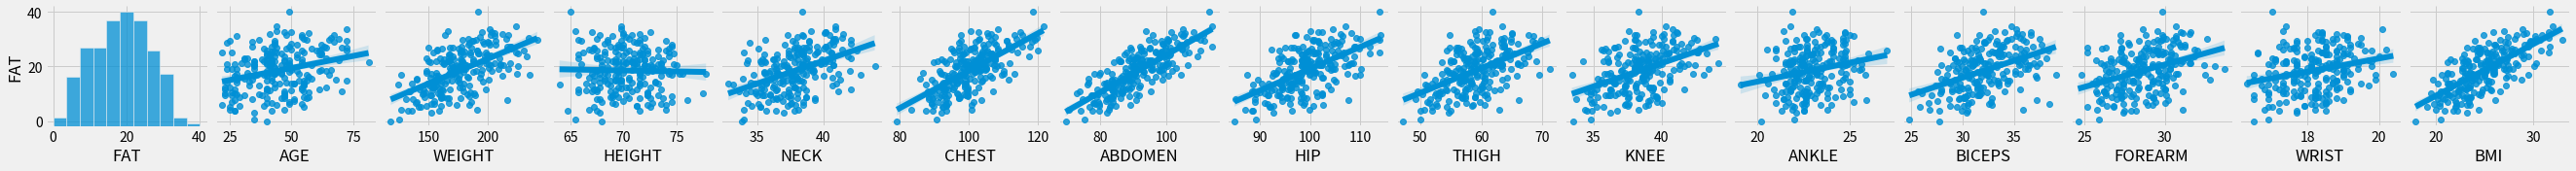

In [12]:
sns.pairplot(df, y_vars='FAT', x_vars = list(df.columns), kind='reg')

- 이상치가 지워졌고 목표변수와 다수의 설명변수 간에 선형관계를 확인하였음

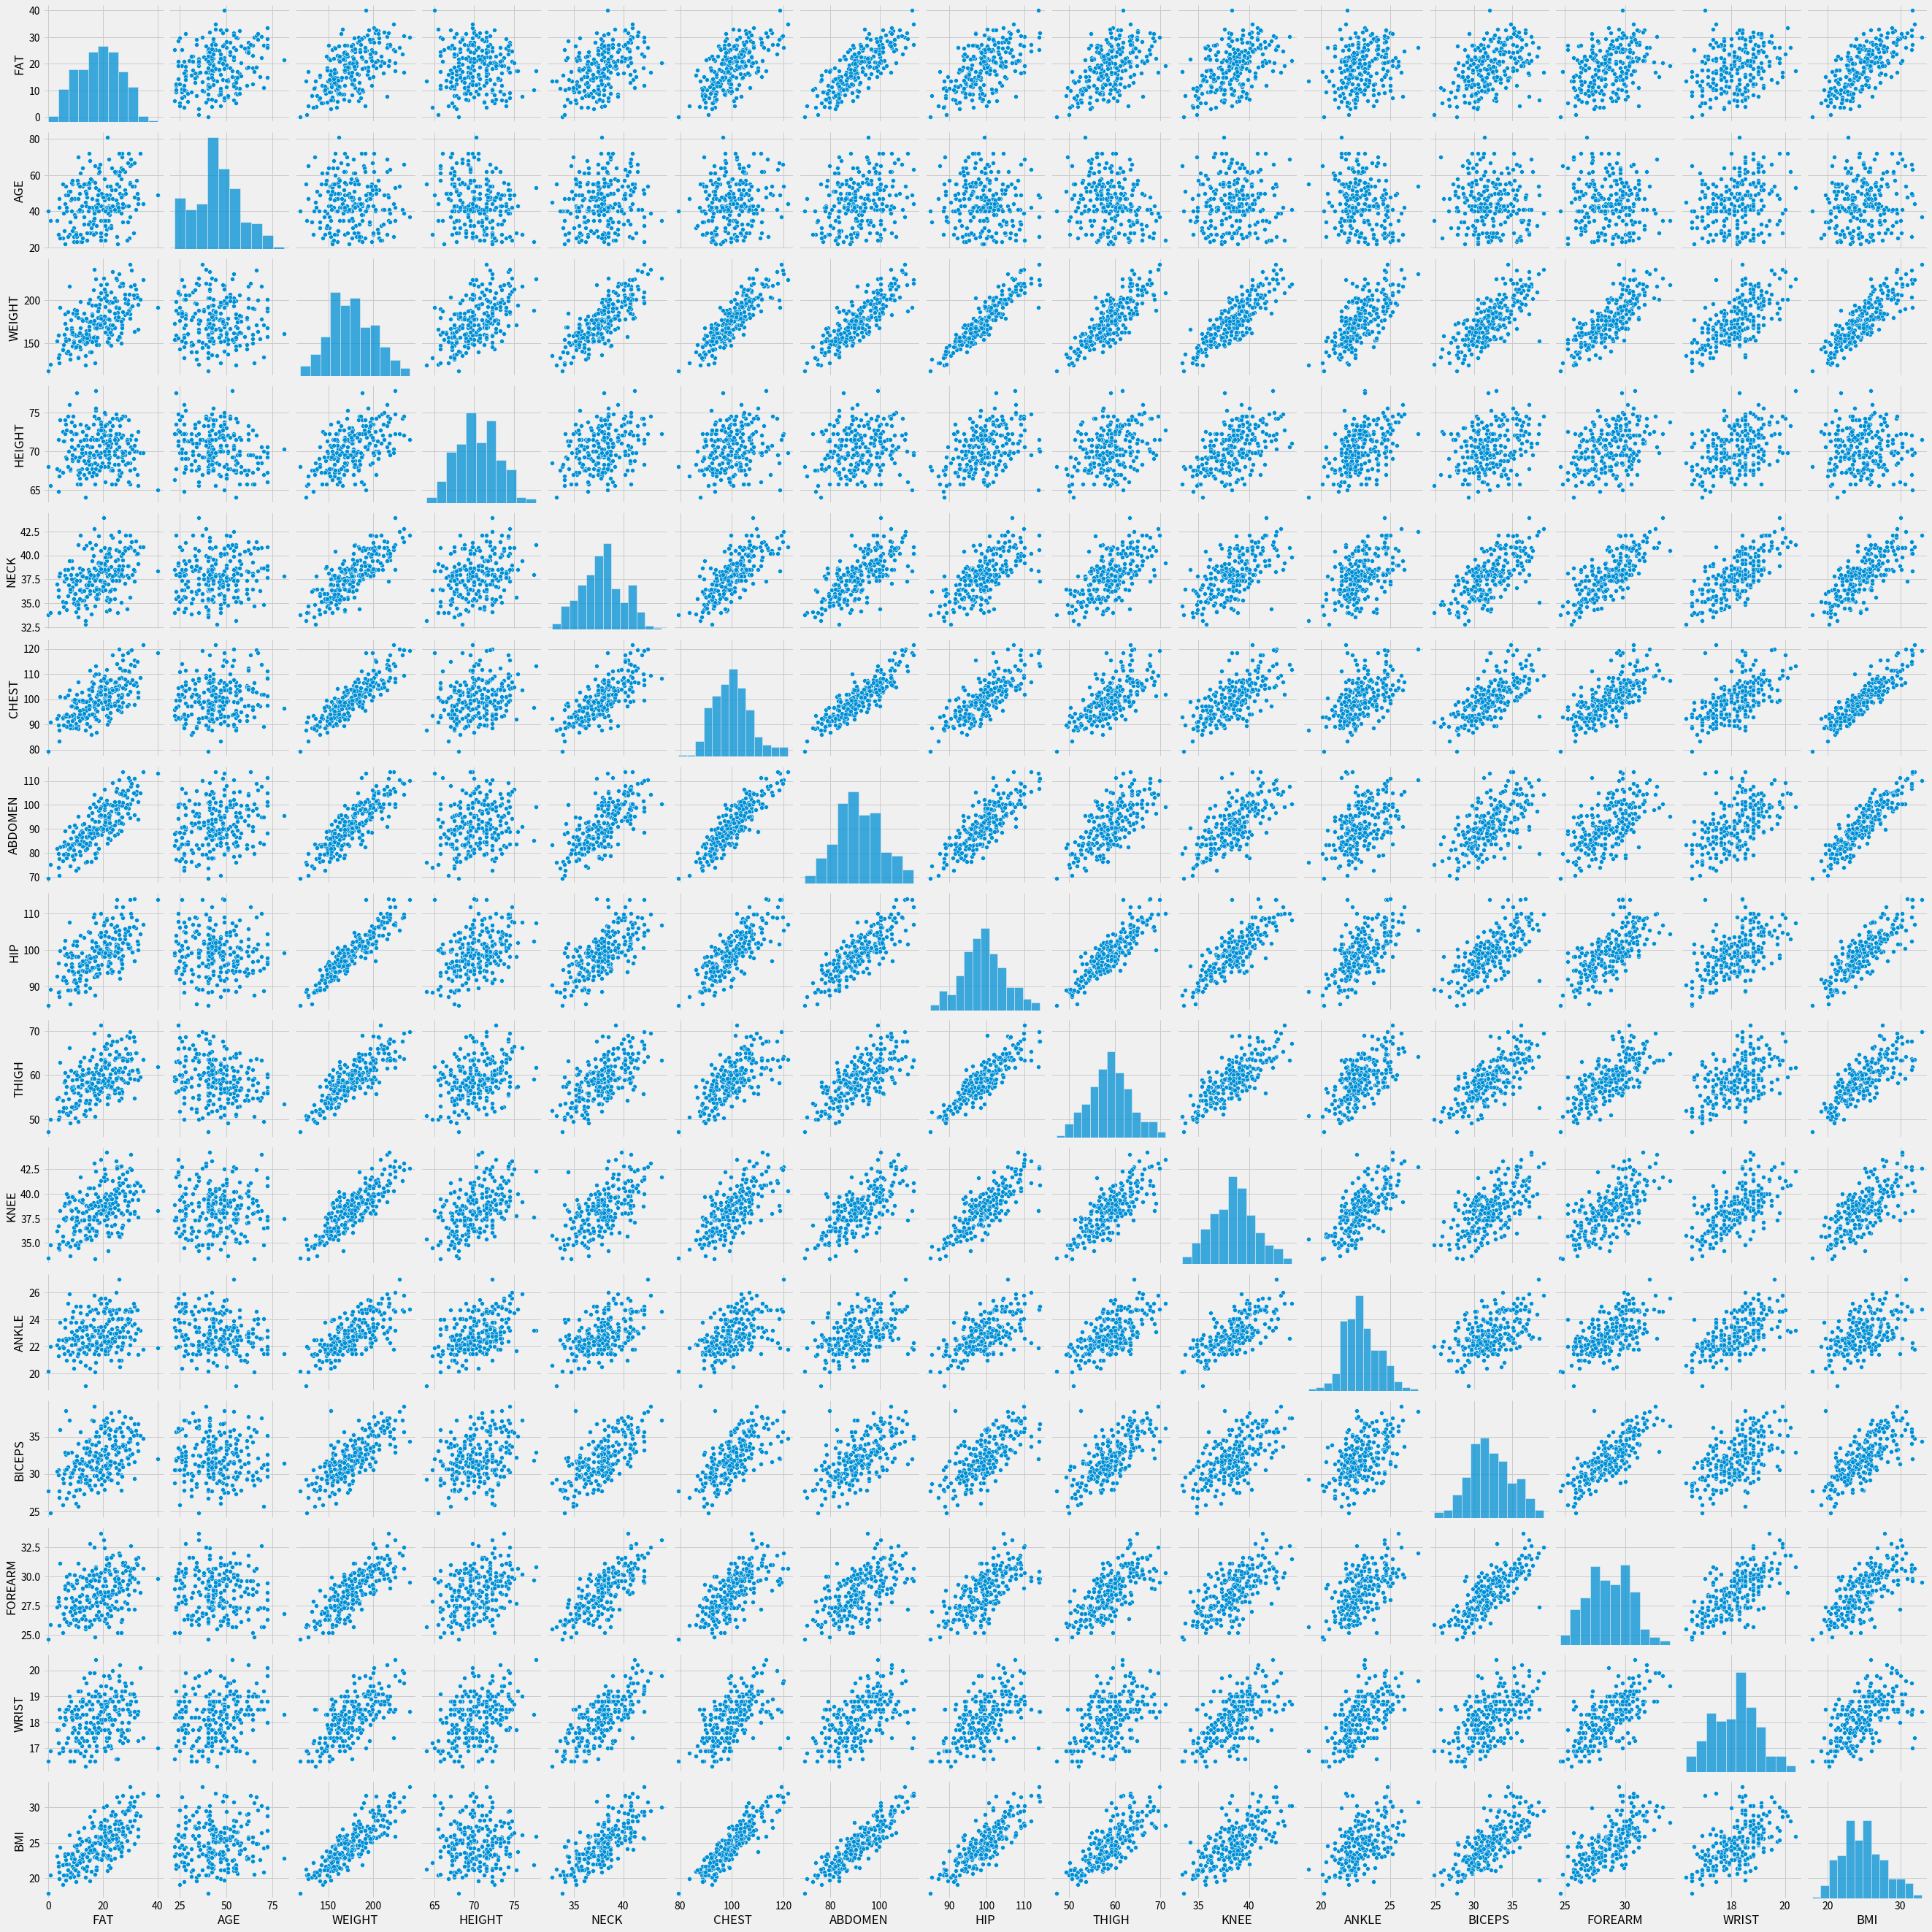

In [13]:
sns.pairplot(df)

- FAT과 WEIGHT, CHEST, ABDOMEN, HIP, THIGH, KNEE, BICEPS, BMI 등 많은 설명변수 간에 선형관계가 있는 것이 확인 됨 

In [14]:
df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.284,0.573,-0.024,0.451,0.658,0.801,0.587,0.523,0.466,0.227,0.445,0.376,0.258,0.709
AGE,0.284,1.000,-0.029,-0.237,0.133,0.177,0.250,-0.084,-0.230,-0.004,-0.187,-0.051,-0.082,0.226,0.115
WEIGHT,0.573,-0.029,1.000,0.544,0.793,0.873,0.852,0.918,0.829,0.844,0.688,0.758,0.793,0.675,0.850
HEIGHT,-0.024,-0.237,0.544,1.000,0.306,0.235,0.203,0.434,0.336,0.496,0.484,0.293,0.367,0.404,0.024
NECK,0.451,0.133,0.793,0.306,1.000,0.747,0.709,0.672,0.623,0.632,0.509,0.677,0.773,0.716,0.749
CHEST,0.658,0.177,0.873,0.235,0.747,1.000,0.888,0.781,0.669,0.686,0.505,0.681,0.695,0.584,0.896
ABDOMEN,0.801,0.250,0.852,0.203,0.709,0.888,1.000,0.826,0.707,0.705,0.458,0.624,0.602,0.535,0.893
HIP,0.587,-0.084,0.918,0.434,0.672,0.781,0.826,1.000,0.874,0.824,0.615,0.694,0.693,0.547,0.826
THIGH,0.523,-0.230,0.829,0.336,0.623,0.669,0.707,0.874,1.000,0.779,0.632,0.714,0.694,0.478,0.777
KNEE,0.466,-0.004,0.844,0.496,0.632,0.686,0.705,0.824,0.779,1.000,0.708,0.618,0.662,0.612,0.695


- FAT과 ABDOMEN의 상관계수가 매우 높은 것을 확인 할 수 있고 CHEST, BMI 또한 상관계수가 높은 편이다.
- WEIGHT, ABDOMEN, CHEST, THIGH, HIP과 같은 설명변수 간에도 선형관계가 있어 다중공선성 확인이 필요하다.

In [15]:
## train,test 분리 
df_train, df_test = train_test_split(df, test_size=0.4, random_state=1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (139, 15)
test data size : (94, 15)


# 회귀모델 생성 및 후진 제거법을 이용한 변수 선택

## 0) 모든 변수 넣어서 회귀모델 생성

In [16]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     28.29
Date:                Mon, 23 May 2022   Prob (F-statistic):           5.45e-32
Time:                        22:03:40   Log-Likelihood:                -378.82
No. Observations:                 139   AIC:                             787.6
Df Residuals:                     124   BIC:                             831.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -156.8011     80.909     -1.938      0.0

## 1) BICEPS 변수 제거

In [17]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 23 May 2022   Prob (F-statistic):           9.76e-33
Time:                        22:03:40   Log-Likelihood:                -378.84
No. Observations:                 139   AIC:                             785.7
Df Residuals:                     125   BIC:                             826.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -159.1367     79.561     -2.000      0.0

## 2) HIP 변수 제거

In [18]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + THIGH + KNEE + ANKLE + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     32.93
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.82e-33
Time:                        22:03:40   Log-Likelihood:                -379.79
No. Observations:                 139   AIC:                             785.6
Df Residuals:                     126   BIC:                             823.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -148.9778     79.414     -1.876      0.0

## 3) ANKLE 변수 제거

In [19]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + THIGH + KNEE + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     35.58
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.40e-33
Time:                        22:03:40   Log-Likelihood:                -380.71
No. Observations:                 139   AIC:                             785.4
Df Residuals:                     127   BIC:                             820.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -151.9087     79.591     -1.909      0.0

## 4) NECK 변수 제거

In [20]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + CHEST + ABDOMEN + THIGH + KNEE + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     38.95
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.97e-34
Time:                        22:03:40   Log-Likelihood:                -381.38
No. Observations:                 139   AIC:                             784.8
Df Residuals:                     128   BIC:                             817.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -161.1350     79.229     -2.034      0.0

## 5) THIGH 변수 제거

In [21]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + CHEST + ABDOMEN + KNEE + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     42.90
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.28e-34
Time:                        22:03:40   Log-Likelihood:                -382.24
No. Observations:                 139   AIC:                             784.5
Df Residuals:                     129   BIC:                             813.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -164.8405     79.359     -2.077      0.0

## 6) CHEST 변수 제거

In [22]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + ABDOMEN + KNEE + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     47.14
Date:                Mon, 23 May 2022   Prob (F-statistic):           7.87e-35
Time:                        22:03:40   Log-Likelihood:                -383.86
No. Observations:                 139   AIC:                             785.7
Df Residuals:                     130   BIC:                             812.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -171.1432     79.897     -2.142      0.0

## 7) KNEE 변수 제거

In [23]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + ABDOMEN + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     52.78
Date:                Mon, 23 May 2022   Prob (F-statistic):           3.96e-35
Time:                        22:03:40   Log-Likelihood:                -385.31
No. Observations:                 139   AIC:                             786.6
Df Residuals:                     131   BIC:                             810.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -184.7587     80.002     -2.309      0.0

- 해당 회귀식은 p-value가 0에 근사하므로 모델(회귀식)이 유의미하다는 것을 알 수 있고 또한 다중회귀식이기 때문에 수정된 결정계수를 보면 0.724로 모델이 데이터의 72.4%를 설명할 수 있다는 것을 알 수 있다. 후진제거법으로 변수들은 제거 한 결과 p-value 유의미한 변수는 AGE, WEIGHT, HEIGHT, ABDOMEN, FOREARM, WRIST, BMI이다. 각 독립변수의 p-value가 HEIGHT를 제외하고 전부 0.05보다 작고 HEIGHT는 0.05보단 크지만 0.053이고 체질 비만도를 측정하기에 중요한 변수라고 판단하여 독립변수로 최종 채택하였다. 

- Durbin-Watson 이 2.159 이므로 독립이고 잔차의 정규성은 prob(Omnibus)는 0.013으로 0.05보단 작지만, prob(JB)가 0.05보다 큰 0.156 이므로 잔차정규성을 만족한다. 

In [24]:
df_train_x = df_train[[ 'AGE', 'WEIGHT', 'HEIGHT', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI']]

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,VIF
1,AGE,1.707
6,WRIST,2.555
5,FOREARM,3.701
4,ABDOMEN,8.526
3,HEIGHT,69.344
7,BMI,215.012
2,WEIGHT,275.642
0,const,55997.773


- WEIGHT의 분산팽창지수가 너무 크기 때문에 다중공선성이 있다고 판단하여 회귀식에서 WEIGHT변수 제외

In [25]:
df_train_x = df_train[[ 'AGE', 'HEIGHT', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI']]

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,VIF
1,AGE,1.700
2,HEIGHT,2.304
5,WRIST,2.549
4,FOREARM,3.683
3,ABDOMEN,8.453
6,BMI,11.488
0,const,1061.571


- WEIGHT 변수 제외하고 다시 다중공선성을 확인해본결과 분산팽창지수가 10을 그렇게 초과하지 않는다.

- 해당 변수들을 다시 회귀모델에 넣음

In [26]:
reg_model = smf.ols(formula = 'FAT ~ AGE + HEIGHT + ABDOMEN + FOREARM + WRIST + BMI', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     58.90
Date:                Mon, 23 May 2022   Prob (F-statistic):           5.77e-35
Time:                        22:03:40   Log-Likelihood:                -387.96
No. Observations:                 139   AIC:                             789.9
Df Residuals:                     132   BIC:                             810.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1169     11.184     -0.547      0.5

- BMI의 p-value가 너무 높아 BMI 변수 제거

In [27]:
reg_model = smf.ols(formula = 'FAT ~ AGE + HEIGHT + ABDOMEN + FOREARM + WRIST', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     71.13
Date:                Mon, 23 May 2022   Prob (F-statistic):           6.89e-36
Time:                        22:03:40   Log-Likelihood:                -388.03
No. Observations:                 139   AIC:                             788.1
Df Residuals:                     133   BIC:                             805.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.2639     10.672     -0.681      0.4

- HEIGHT의 p-value가 너무 높아 HEIGHT 변수 제거

In [28]:
reg_model = smf.ols(formula = 'FAT ~ AGE + ABDOMEN + FOREARM + WRIST', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     87.39
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.25e-36
Time:                        22:03:40   Log-Likelihood:                -389.27
No. Observations:                 139   AIC:                             788.5
Df Residuals:                     134   BIC:                             803.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.3527      7.320     -2.644      0.0

- 해당 회귀식은 p-value가 0에 근사하므로 모델(회귀식)이 유의미하다는 것을 알 수 있고 또한 다중회귀식이기 때문에 수정된 결정계수를 보면 0.715로 모델이 데이터의 71.5%를 설명할 수 있다는 것을 알 수 있다. 후진제거법으로 변수들은 제거 한 결과 p-value 유의미한 변수는 AGE, ABDOMEN, FOREARM, WRIST이다. 각 독립변수의 p-value가 전부 0.05보다 작기 때문에 독립변수로 최종 채택하였다. 

- Durbin-Watson 이 2.163 이므로 독립이고 잔차의 정규성은 prob(Omnibus)는 0.126, prob(JB)가 0.304으로 0.05보다 크므로 잔차정규성을 만족한다. 

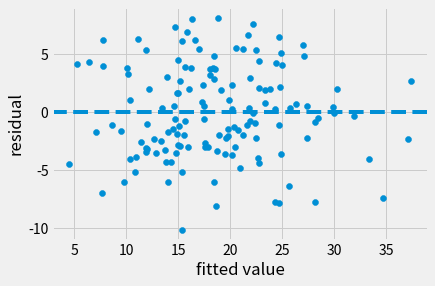

In [29]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0,linestyle='--')
plt.show()

- 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성을 만족한다.

/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


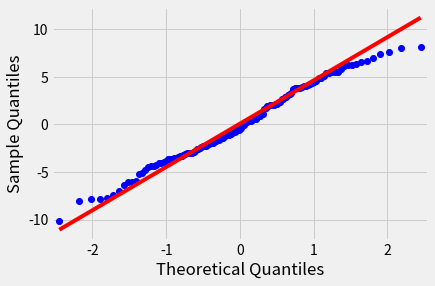

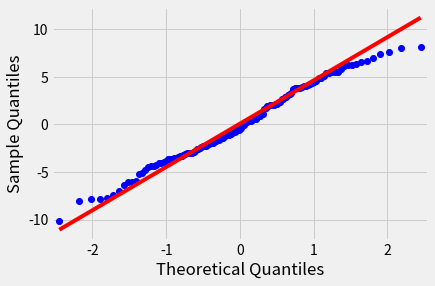

In [30]:
qqplot(reg_result.resid, line='q')

- 정규분포 직선을 중심으로 분포하므로 정규분포를 따른다.

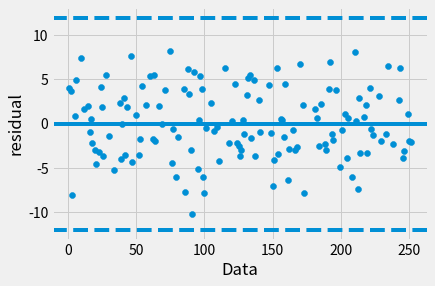

In [31]:
plt.scatter(df_train.index, reg_result.resid, marker='o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y=0, linestyle='-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = '--')
plt.show()

- 잔차가 y=0을 기준으로 관리상하한을 벗어나지 않고 random하게 산포되어있으므로 독립성을 만족

In [32]:
df_train

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
229,19.2,24,208.50,72.75,39.2,102.0,99.1,110.1,71.2,43.5,25.2,36.1,30.3,18.7,27.478002
223,19.1,28,179.00,68.00,39.1,103.3,95.9,104.9,63.5,38.0,22.1,32.5,30.3,18.4,27.001027
184,10.8,47,159.75,70.75,34.5,92.9,84.4,94.0,56.0,38.2,22.6,29.0,26.2,17.6,22.260405
40,29.9,37,241.25,71.50,42.1,119.2,110.3,113.9,69.8,42.6,24.8,34.4,29.5,18.4,32.915490
217,27.1,44,186.00,69.75,37.8,104.6,101.1,102.1,58.9,37.9,22.7,30.9,28.8,17.6,26.666720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,29.0,34,195.75,71.00,38.9,101.9,96.4,105.2,64.8,40.8,23.1,36.2,30.8,17.3,27.085082
60,27.9,52,206.50,74.50,40.8,104.3,99.2,104.1,58.5,39.3,24.6,33.9,31.2,19.5,25.950910
43,25.2,55,198.50,74.25,38.3,105.3,96.7,106.6,64.0,42.6,23.4,33.2,30.0,18.4,25.113814
228,17.0,65,127.50,65.75,34.7,93.0,79.7,87.6,50.7,33.4,20.1,28.5,24.8,16.5,20.571395


In [33]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print('train data의 결정계수:', r2_score(df_train['FAT'], train_pred))
print('test data의 결정계수:', r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.722893611994599
test data의 결정계수: 0.6274480986118833


- train data의 결정계수는 0.722이고 test data의 결정계수는 0.627이다. 모델이 각 데이터셋에 대하여 설명을 잘 하는 편이고 인간의 신체데이터 이기 때문에 각 변수간의 다중공선성이 높아 변수가 많이 제거된 것으로 보인다.

- 최종회귀식

Y = -19.3527 + 0.0997 * AGE + 0.6574 * ABDOMEN + 0.9105 * FOREARM -2.9191 * WRIST 

=> 목표변수 FAT은 나이가 많을수록, 복부둘레가 커질수록, 전완근이 커질수록 높다. 이에반해 손목 두께는 얇을수록 비만도가 높다.

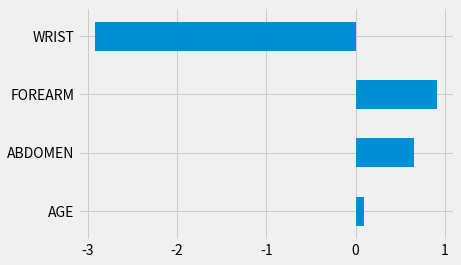

In [34]:
selected_cols = ['AGE', 'ABDOMEN', 'FOREARM', 'WRIST']
df_reg_coef = pd.DataFrame({'Coef':reg_result.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y='Coef', legend = False)
plt.show()